In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from numpy import exp, loadtxt, pi, sqrt
from lmfit import Model

In [40]:
response_current = requests.get("https://covidtracking.com/api/states")
response_daily = requests.get("https://covidtracking.com/api/states/daily")

In [41]:
dfs = []
for data in enumerate(response_daily.json()):
    dfs.append(pd.DataFrame(data[1], index=[data[0]]))
df_final = pd.concat(dfs)

In [43]:
df_final.head(10)

,date,state,positive,negative,pending,hospitalized,death,total,hash,dateChecked,totalTestResults,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200327,AK,69,2319,13,3,1,2401,588f633d59494e4d58466fccfa9628c98568396b,2020-03-27T20:00:00Z,2388,02,0,0,518,10,528
1,20200327,AL,587,4184,None,None,3,4771,c3883f10c8760fdd9d196c5e2483205434bc4e0f,2020-03-27T20:00:00Z,4771,01,2,0,591,81,672
2,20200327,AR,381,1545,0,48,3,1926,a67d588363970b93865400184a7b96de73096b8d,2020-03-27T20:00:00Z,1926,05,0,7,41,46,87
3,20200327,AS,0,None,0,None,0,0,84bac05a7009ace4086a2e5280d56a5ccea95c40,2020-03-27T20:00:00Z,0,60,0,0,0,0,0
4,20200327,AZ,736,7455,30,None,13,8221,81fb87573f6b5484fc4879e20ef93989c969d113,2020-03-27T20:00:00Z,8191,04,5,0,7108,159,7267
5,20200327,CA,3879,17380,57400,746,78,78659,d7b5a1250b2f63a88e58953c8547feab1986f158,2020-03-27T20:00:00Z,21259,06,13,746,0,873,873
6,20200327,CO,1430,8692,None,184,24,10122,47ea1cad10813f21f89b795589930e0be43ca6a1,2020-03-27T20:00:00Z,10122,08,5,36,1714,344,2058
7,20200327,CT,1291,7109,None,173,27,8400,890423bc4025abb5384d27c05582d7b59db0de3c,2020-03-27T20:00:00Z,8400,09,6,48,1484,279,1763
8,20200327,DC,267,1897,2,None,3,2166,240b1b4a63a74f4ec3b4d336b27c067924f2a10d,2020-03-27T20:00:00Z,2164,11,0,0,271,36,307
9,20200327,DE,163,36,None,15,2,199,86c4ed17fc96d0ee24845dfe40520b0309719dc5,2020-03-27T20:00:00Z,199,10,1,2,0,33,33


In [58]:
df_ny = df_final[df_final["state"] == "NY"].sort_values(by="date", ascending=True)
df_ny["death"] = df_ny["death"].apply(lambda x: 0 if str(x) == "None" else x)
df_ny

,date,state,positive,negative,pending,hospitalized,death,total,hash,dateChecked,totalTestResults,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
1199,20200304,NY,6,48,24,None,0,78,1afd6e025157a38728847bbf42145c63b024c387,2020-03-04T21:00:00Z,54,36,None,None,None,None,None
1182,20200305,NY,22,76,24,None,0,122,25c15099a4116ff026c04c0b4a6b3780ccba310b,2020-03-05T21:00:00Z,98,36,0,0,28,16,44
1155,20200306,NY,33,92,236,None,0,361,1bd1fecfd3d23311c604ac6c27d05ce5835af2c5,2020-03-06T21:00:00Z,125,36,0,0,16,11,27
1114,20200307,NY,76,92,236,None,0,404,d9b32dfe41c22decc86fe0a35515525a18b68fa9,2020-03-07T21:00:00Z,168,36,0,0,0,43,43
1063,20200308,NY,105,92,None,None,0,197,22912a8c6cdefd796b1412292c796959a8cc088f,2020-03-08T20:00:00Z,197,36,0,0,0,29,29
1012,20200309,NY,142,92,None,None,0,234,917b6249196222819cd69f60c3660aa7e4527b2b,2020-03-09T20:00:00Z,234,36,0,0,0,37,37
961,20200310,NY,173,92,None,None,0,265,4a5c3cc848789d1ad8988ed7e0b5d3685146d13e,2020-03-10T20:00:00Z,265,36,0,0,0,31,31
910,20200311,NY,216,92,None,None,0,308,b25e6d0e621fd1fde43a17ce7295e57200236679,2020-03-11T20:00:00Z,308,36,0,0,0,43,43
859,20200312,NY,216,92,None,None,0,308,d57b4b9097165e7d21987a2f82a772b1bdce4d81,2020-03-12T20:00:00Z,308,36,0,0,0,0,0
808,20200313,NY,421,2779,None,None,0,3200,6fda547acc42c002171b42fd6fa24d610c61477f,2020-03-13T20:00:00Z,3200,36,0,0,2687,205,2892


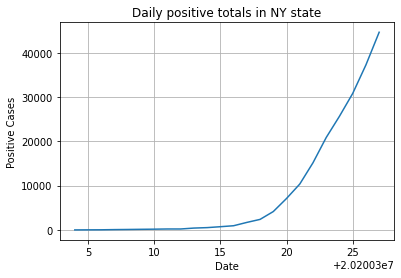

In [60]:
plt.plot(df_ny["date"], df_ny["positive"])
plt.title("Daily positive totals in NY state")
plt.xlabel("Date")
plt.ylabel("Positive Cases")
plt.grid(True)

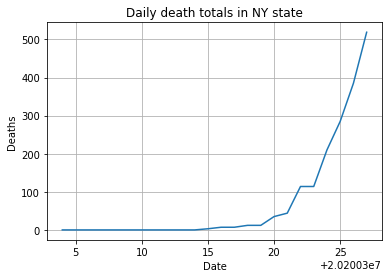

In [62]:
plt.plot(df_ny["date"], df_ny["death"])
plt.title("Daily death totals in NY state")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.grid(True)

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 24
    # variables        = 3
    chi-square         = 5.8398e+09
    reduced chi-square = 2.7809e+08
    Akaike info crit   = 469.437893
    Bayesian info crit = 472.972054
##  Warning: uncertainties could not be estimated:
    amp:  at initial value
    cen:  at initial value
    wid:  at initial value
[[Variables]]
    amp:  10.0000000 (init = 10)
    cen:  10.0000000 (init = 10)
    wid:  1.00000000 (init = 1)


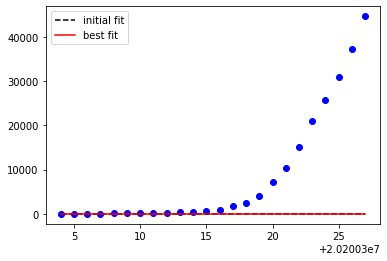

In [75]:
#Function that I'm playing with; ingnore 

def gaussian(x, amp, cen, wid):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return (amp / (sqrt(2*pi) * wid)) * exp(-(x-cen)**2 / (2*wid**2))

x = df_ny["date"].tolist()
y = df_ny["positive"].tolist()

gmodel = Model(gaussian)
result = gmodel.fit(y, x=x, amp=10, cen=10, wid=1)

print(result.fit_report())

plt.plot(x, y, 'bo')
plt.plot(x, result.init_fit, 'k--', label='initial fit')
plt.plot(x, result.best_fit, 'r-', label='best fit')
plt.legend(loc='best')
plt.show()